## COMP5721M: Programming for Data Science 

## Group project (Coursework 2): Data Analysis Project


# _Analysis of Wine Market Characteristics and Pricing Patterns_


Project participants:

* Yike Xiao, fszt6675@leeds.ac.uk
* Yihao Zhang, srth4846@leeds.ac.uk
* Wei Qing lee, xrsb4656@leeds.ac.uk
* Yuhao Wu, jscw7310@leeds.ac.uk

# Project Plan

## The Data 

The dataset for this analysis project was sourced from Kaggle. It comprises a comprehensive collection of wine-related information, encompassing multiple essential attributes that characterize both the product specifications and market positioning of various wines. 

The dataset contains several key categorical and numerical variables that provide rich insights into wine products:

Product Identification
- Title and Description fields provide basic product information
- Vintage information indicating production years
- Type and Style categories defining wine classifications
- Country and Region data offering geographical context
- Appellation information for wine origin certification

Technical Wine Characteristics
- Grape varieties (primary and secondary) indicating wine composition
- ABV (Alcohol By Volume) percentages
- Closure type provides packaging information

Commercial Attributes
- Price information
- Per bottle/case/each categorization for different sales units
- Characteristics descriptions for wine properties

This dataset provides a comprehensive view of the global wine market, covering a wide range of wine types, origins, and price points. The data appears to be well-structured, with clear and consistent labeling of the features. Based on a preliminary review, the data seems to be accurate and reliable, with no obvious signs of missing values or inconsistencies.

One potential limitation of the dataset is that it may not capture the most recent wine releases, as the dataset was last updated in 2017. However, the wealth of historical data should still provide valuable insights into the factors that influence wine quality, pricing, and consumer preferences.

Overall, this wine dataset offers a rich source of information that can be leveraged to address a variety of research questions and business challenges related to the wine industry. Its comprehensive coverage of wine attributes and the large number of data points make it a suitable choice for my data analysis project.

## Project Aim and Objectives 
The general aim of this project is to understand the key factors that influence wine quality and pricing in the market, while also exploring geographical impacts and consumer preferences.  The project will focus on both correlation analysis and visualization techniques to uncover hidden patterns in the wine market data, while also implementing classification methods to categorize wines based on their characteristics.

### Specific Objective(s)
- Objective 1: Analyze and visualize the relationship between wine prices and regions/countries using basic statistical methods and create clear visualizations to identify which regions tend to have higher or lower-priced wines.

- Objective 2: Investigate the correlation between grape varieties and wine characteristics, creating a summary visualization that shows which characteristics are most common for different grape types.

- Objective 3: Explore the relationship between wine closure type and pricing, using statistical tests to determine if there are significant differences in prices based on closure method.

- Objective 4: Develop a simple price category classification system based on the price distribution in the dataset and analyze what features are common in each category.


## System Design

### Architecture


### Processing Modules and Algorithms
1. Data Preprocessing
- Clean missing values and standardize formats
- Convert text data to appropriate numerical formats
- Create categories for quality and price ranges
- Standardize geographical information

2. Analysis 
- Calculate descriptive statistics for each objective
- Perform correlation analysis between variables
- Create quality classification categories
- Analyze geographical patterns

3. Visualization
- Create price distribution plots
- Generate region comparison charts
- Plot characteristic relationships
- Develop geographical visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv("C:\\Users\\Admin\\Documents\\Leeds\\COMP5712\\data\\WineDataset.csv")

In [3]:
wine_df.head(10)

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley
5,Louis Roederer 'Cristal' Champagne 2015,Cristal is Louis Roederer’s flagship wine. It ...,£300.00 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,9.0,NaN,per bottle,White,ABV 12.00%,NaN,NaN,2015,NaN
6,"La Gioiosa Prosecco DOC, Treviso","In Treviso, Prosecco’s heartland, the locals h...",£12.99 per bottle,75CL,Glera,NaN,Natural Cork,Italy,8.3,"Green Apple, Citrus Fruit, Floral",per bottle,White,ABV 11.00%,Prosecco Doc,Light & Refreshing,NV,NaN
7,The Macallan Sherry Oak 12 Year Old Single Mal...,The Macallan’s rich heritage dates back to 182...,£80.00 per bottle,70CL,NaN,NaN,Natural Cork,Scotland,28.0,NaN,per bottle,Brown,ABV 40.00%,NaN,NaN,NV,NaN
8,Bouvet Ladubay Saumur Brut,The Loire Valley’s Saumur Brut is the go-to ap...,£13.99 per bottle,75CL,Chenin Blanc,NaN,Natural Cork,France,9.4,"Honeysuckle, Citrus Fruit",per bottle,White,ABV 12.50%,Loire,Rich & Toasty,NV,Saumur
9,"LB7 Red 2020/21, Lisbon",Portuguese red blends are a Majestic specialit...,£8.99 per bottle,75CL,Castelão,"Touriga Nacional, Tinta Roriz",Natural Cork,Portugal,10.1,"Spice, Black Fruit, Black Plum, Blackberry",per bottle,Red,ABV 13.50%,Lisboa,Rich & Juicy,2021,NaN


In [4]:
wine_df.columns

Index(['Title', 'Description', 'Price', 'Capacity', 'Grape',
       'Secondary Grape Varieties', 'Closure', 'Country', 'Unit',
       'Characteristics', 'Per bottle / case / each', 'Type', 'ABV', 'Region',
       'Style', 'Vintage', 'Appellation'],
      dtype='object')

In [5]:
wine_df.shape

(1290, 17)

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

In [7]:
wine_df.dtypes

Title                         object
Description                   object
Price                         object
Capacity                      object
Grape                         object
Secondary Grape Varieties     object
Closure                       object
Country                       object
Unit                         float64
Characteristics               object
Per bottle / case / each      object
Type                          object
ABV                           object
Region                        object
Style                         object
Vintage                       object
Appellation                   object
dtype: object

In [8]:
wine_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,1290,1289,Aqualta Prosecco DOC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1286,1283,Nicolás Catena was the first South American wi...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1290,128,£11.99 per bottle,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capacity,1290,13,75CL,1193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grape,1275,113,Chardonnay,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Secondary Grape Varieties,488,198,"Pinot Noir, Pinot Meunier",36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closure,1279,4,Natural Cork,834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1284,25,France,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,1281.0,NaN,NaN,NaN,10.177674,2.31885,0.0,9.4,10.1,10.5,39.0
Characteristics,1253,888,"Strawberry, Peach, Raspberry",17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
wine_df.isnull().sum()

Title                          0
Description                    4
Price                          0
Capacity                       0
Grape                         15
Secondary Grape Varieties    802
Closure                       11
Country                        6
Unit                           9
Characteristics               37
Per bottle / case / each       0
Type                           5
ABV                            9
Region                       166
Style                         78
Vintage                        7
Appellation                  646
dtype: int64

## Data Cleaning

1. Handling Missing Value

In [10]:
# Create a copy of the dataframe
wine_clean = wine_df.copy()

In [11]:
# Handle missing values for categorical columns
categorical_cols = ['Title', 'Description', 'Grape', 'Secondary Grape Varieties', 
                   'Closure', 'Country', 'Characteristics', 'Type', 'Region', 
                   'Style', 'Appellation']

for col in categorical_cols:
    wine_clean[col] = wine_clean[col].fillna('Unknown')

# Fill missing Unit values with the mode
wine_clean['Unit'] = wine_clean['Unit'].fillna(wine_clean['Unit'].mode()[0])

In [12]:
wine_clean.isnull().sum()

Title                        0
Description                  0
Price                        0
Capacity                     0
Grape                        0
Secondary Grape Varieties    0
Closure                      0
Country                      0
Unit                         0
Characteristics              0
Per bottle / case / each     0
Type                         0
ABV                          9
Region                       0
Style                        0
Vintage                      7
Appellation                  0
dtype: int64

### Price Column

In [13]:
# Clean Price column
# the original price values
wine_clean['Price'].unique()

array(['£9.99 per bottle', '£15.99 per bottle', '£12.49 per bottle',
       '£17.99 per bottle', '£300.00 per bottle', '£12.99 per bottle',
       '£80.00 per bottle', '£13.99 per bottle', '£8.99 per bottle',
       '£11.99 per bottle', '£46.99 per bottle', '£11.29 per bottle',
       '£22.99 per bottle', '£45.99 per bottle', '£49.99 per bottle',
       '£33.99 per bottle', '£23.99 per bottle', '£21.99 per bottle',
       '£42.99 per bottle', '£29.99 per bottle', '£39.99 per bottle',
       '£14.99 per bottle', '£16.99 per bottle', '£7.99 per bottle',
       '£18.99 per bottle', '£19.99 per bottle', '£10.99 per bottle',
       '£34.99 per bottle', '£43.99 per bottle', '£24.99 per bottle',
       '£35.99 per bottle', '£37.99 per bottle', '£99.99 per bottle',
       '£75.99 per bottle', '£79.00 per case', '£61.99 per bottle',
       '£57.99 per bottle', '£20.99 per bottle', '£44.99 per bottle',
       '£36.99 per bottle', '£69.99 per bottle', '£25.99 per bottle',
       '£6.99 per bottle

In [14]:
# Extract unique suffixes and display them directly
unique_suffixes = wine_clean['Price'].str.extract(r'\d+\.?\d*\s*(.*)')[0].str.strip().unique()

# Display unique suffixes
print(unique_suffixes)


['per bottle' 'per case' 'each']


In [15]:
# Filter rows where 'Price' column contains 'per case'
per_case_rows = wine_clean[wine_clean['Per bottle / case / each'].str.contains('per case')]

# Filter rows where 'Price' column contains 'per case'
per_case_rows1 = wine_clean[wine_clean['Price'].str.contains('per case', na=False)]

per_case_rows1.equals(per_case_rows)

True

In [16]:
# Filter rows where 'Price' column contains 'each'
each_rows = wine_clean[wine_clean['Per bottle / case / each'].str.contains('each')]

# Filter rows where 'Price' column contains 'per case'
each_rows1 = wine_clean[wine_clean['Price'].str.contains('each', na=False)]

each_rows1.equals(each_rows)

True

In [17]:
# Remove non-numeric characters and convert to float
wine_clean['Price'] = wine_clean['Price'].str.replace('£', '', regex=False)  # Remove '£' symbol
wine_clean['Price'] = wine_clean['Price'].str.replace(' per bottle', '', regex=False)
wine_clean['Price'] = wine_clean['Price'].str.replace(' per case', '', regex=False)
wine_clean['Price'] = wine_clean['Price'].str.replace(' each', '', regex=False)

# Convert to float
wine_clean['Price'] = wine_clean['Price'].astype(float)

In [18]:
wine_clean.head(10)

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,75CL,Tempranillo,Unknown,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,Unknown,Rich & Juicy,NV,Unknown
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,15.99,75CL,Chardonnay,Unknown,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,12.49,75CL,Sauvignon Blanc,Unknown,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,Unknown
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,17.99,75CL,Chardonnay,Unknown,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,15.99,75CL,Pinot Noir,Unknown,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley
5,Louis Roederer 'Cristal' Champagne 2015,Cristal is Louis Roederer’s flagship wine. It ...,300.00,75CL,Chardonnay,Unknown,Natural Cork,France,9.0,Unknown,per bottle,White,ABV 12.00%,Unknown,Unknown,2015,Unknown
6,"La Gioiosa Prosecco DOC, Treviso","In Treviso, Prosecco’s heartland, the locals h...",12.99,75CL,Glera,Unknown,Natural Cork,Italy,8.3,"Green Apple, Citrus Fruit, Floral",per bottle,White,ABV 11.00%,Prosecco Doc,Light & Refreshing,NV,Unknown
7,The Macallan Sherry Oak 12 Year Old Single Mal...,The Macallan’s rich heritage dates back to 182...,80.00,70CL,Unknown,Unknown,Natural Cork,Scotland,28.0,Unknown,per bottle,Brown,ABV 40.00%,Unknown,Unknown,NV,Unknown
8,Bouvet Ladubay Saumur Brut,The Loire Valley’s Saumur Brut is the go-to ap...,13.99,75CL,Chenin Blanc,Unknown,Natural Cork,France,9.4,"Honeysuckle, Citrus Fruit",per bottle,White,ABV 12.50%,Loire,Rich & Toasty,NV,Saumur
9,"LB7 Red 2020/21, Lisbon",Portuguese red blends are a Majestic specialit...,8.99,75CL,Castelão,"Touriga Nacional, Tinta Roriz",Natural Cork,Portugal,10.1,"Spice, Black Fruit, Black Plum, Blackberry",per bottle,Red,ABV 13.50%,Lisboa,Rich & Juicy,2021,Unknown


### Capacity Column

In [19]:
wine_clean['Capacity'].unique()

array(['75CL', '70CL', '750ML', '1.5LTR', 'Our', '37.5CL', '2.25L',
       '500ML', '50CL', '150CL', '300CL', '5LITRE', '375ML'], dtype=object)

In [20]:
# Define a function to convert all capacities to milliliters (ML)
def convert_to_ml(value):
    # Remove whitespace and convert to uppercase for consistency
    value = value.strip().upper()

    # Handle each unit by identifying and converting it to milliliters
    if 'ML' in value:
        return int(value.replace('ML', ''))  # Return as integer
    elif 'CL' in value:
        return int(float(value.replace('CL', '')) * 10)  # 1 CL = 10 ML
    elif 'LITRE' in value or 'LTR' in value or 'L' in value:
        return int(float(value.replace('LITRE', '').replace('LTR', '').replace('L', '')) * 1000)  # 1 Litre = 1000 ML
    else:
        return np.nan  # Handle unexpected values, like 'Our'

# Apply the function to the 'Capacity' column
wine_clean['Capacity(ML)'] = wine_clean['Capacity'].apply(convert_to_ml)

# Display the cleaned Capacity_ML column
wine_clean.head()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation,Capacity(ML)
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,75CL,Tempranillo,Unknown,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,Unknown,Rich & Juicy,NV,Unknown,750.0
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,15.99,75CL,Chardonnay,Unknown,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley,750.0
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,12.49,75CL,Sauvignon Blanc,Unknown,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,Unknown,750.0
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,17.99,75CL,Chardonnay,Unknown,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon,750.0
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,15.99,75CL,Pinot Noir,Unknown,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley,750.0


In [21]:
# Check if the 'Capacity_ML' column contains NaN values
nan_rows = wine_clean[wine_clean['Capacity(ML)'].isna()]

# Display the rows with NaN values in 'Capacity_ML'
nan_rows

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation,Capacity(ML)
104,Rosé Classics 6 Bottle Wine Case,Rosé wine is perfect for when the sun comes ou...,79.00,Our,Unknown,Unknown,Unknown,Unknown,10.1,Unknown,per case,Rosé,NaN,Unknown,Unknown,NaN,Unknown,NaN
295,The Guv'nor VIP 6 Bottle Taster Case,Unknown,49.00,Our,Unknown,Unknown,Unknown,Unknown,10.1,Unknown,per case,Red,NaN,Unknown,Unknown,NaN,Unknown,NaN
298,The Guv'nor VIP 6 Bottle Wine Case,Just when you thought all the rules were broke...,59.94,Our,Unknown,Unknown,Unknown,Unknown,10.1,Unknown,per case,Red,NaN,Unknown,Unknown,NaN,Unknown,NaN
422,Festive French Classics 12 Bottle Mixed Wine Case,Discover favourites from France's iconic wine ...,120.00,Our,Unknown,Unknown,Unknown,Unknown,10.1,Unknown,per case,Mixed,NaN,Unknown,Unknown,NaN,Unknown,NaN
458,Majestic Classics 12 Red Wine Case,"A varied selection of delicious red wines, per...",90.00,Our,Unknown,Unknown,Unknown,Unknown,10.1,Unknown,per case,Red,NaN,Unknown,Unknown,NaN,Unknown,NaN
460,The Guv'nor Red 6 Bottle Wine Case,A firm Majestic favourite. Pick up this case t...,44.94,Our,Unknown,Unknown,Unknown,Unknown,10.1,Unknown,per case,Red,NaN,Unknown,Unknown,NaN,Unknown,NaN


### ABV Column

In [22]:
wine_clean['ABV'].unique()

array(['ABV 14.00%', 'ABV 13.50%', 'ABV 13.00%', 'ABV 12.00%',
       'ABV 11.00%', 'ABV 40.00%', 'ABV 12.50%', 'ABV 14.40%',
       'ABV 14.50%', 'ABV 14.20%', 'ABV 11.50%', 'ABV 15.00%', nan,
       'ABV 15.50%', 'ABV 12.90%', 'ABV 10.50%', 'ABV 8.00%', 'ABV 9.50%',
       'ABV 13.10%', 'ABV 0.50%', 'ABV 20.00%', 'ABV 20.50%',
       'ABV 18.00%', 'ABV 16.00%', 'ABV 10.00%', 'ABV 8.50%',
       'ABV 17.50%', 'ABV 17.00%', 'ABV 18.50%', 'ABV 13.80%',
       'ABV 5.00%', 'ABV 4.90%', 'ABV 19.00%', 'ABV 14.60%'], dtype=object)

In [23]:
# Remove 'ABV ' and '%' and convert the result to float, directly modifying the 'ABV' column
wine_clean['ABV'] = wine_clean['ABV'].str.replace('ABV ', '', regex=False).str.replace('%', '', regex=False).astype(float)

# Display the cleaned ABV column
wine_clean.head()


,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation,Capacity(ML)
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,75CL,Tempranillo,Unknown,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,14.0,Unknown,Rich & Juicy,NV,Unknown,750.0
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,15.99,75CL,Chardonnay,Unknown,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,13.5,California,Rich & Toasty,2021,Napa Valley,750.0
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,12.49,75CL,Sauvignon Blanc,Unknown,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,13.0,Marlborough,Crisp & Zesty,2022,Unknown,750.0
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,17.99,75CL,Chardonnay,Unknown,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,13.5,Burgundy,Ripe & Rounded,2022,Macon,750.0
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,15.99,75CL,Pinot Noir,Unknown,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,13.5,California,Smooth & Mellow,2021,Napa Valley,750.0


In [39]:

# Calculate IQR for Price
Q1 = wine_clean['Price'].quantile(0.25)
Q3 = wine_clean['Price'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = wine_clean[(wine_clean['Price'] < lower_bound) | (wine_clean['Price'] > upper_bound)]
non_outliers = wine_clean[(wine_clean['Price'] >= lower_bound) & (wine_clean['Price'] <= upper_bound)]

# Calculate the percentage of outliers
num_outliers = outliers.shape[0]
total = wine_clean.shape[0]
percent_outliers = (num_outliers / total) * 100

# Display range and outlier information
print(f"'Price' attribute range: {wine_clean['Price'].min()} - {wine_clean['Price'].max()}.")
print(f"'Price' non-outlier region: {lower_bound} - {upper_bound}.")
print(f"Number of outliers in 'Price' attribute: {num_outliers}.")
print(f"Percentage of 'Price' outliers: {percent_outliers:.1f}%.")


12.99
29.99
'Price' attribute range: 4.99 - 430.0.
'Price' non-outlier region: -12.51 - 55.489999999999995.
Number of outliers in 'Price' attribute: 134.
Percentage of 'Price' outliers: 10.4%.


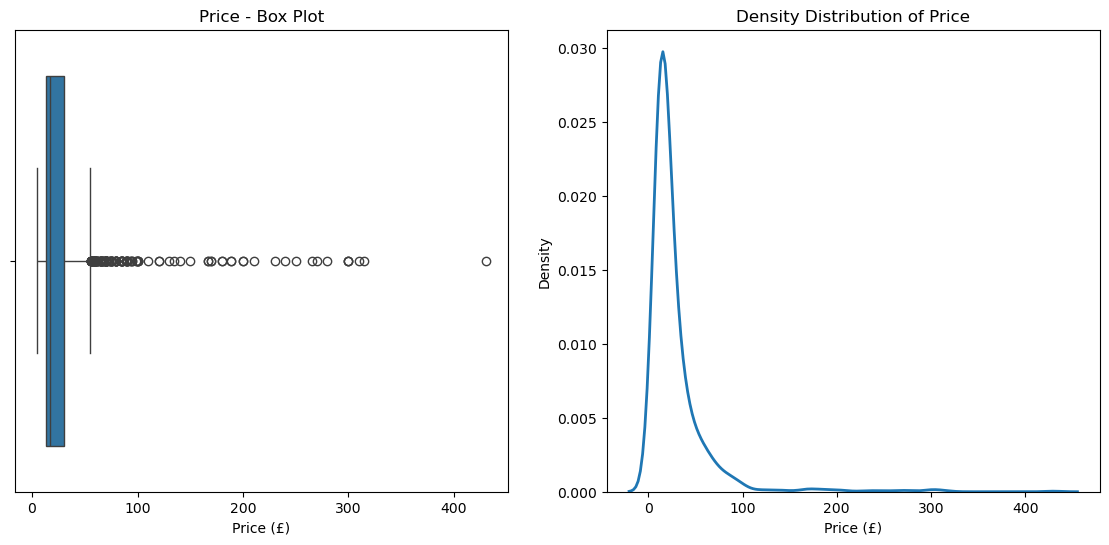

<Figure size 640x480 with 0 Axes>

In [37]:
# Plotting Box Plot and Density Distribution for Price
plt.figure(figsize=(14, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(data=wine_clean, x='Price')
plt.title('Price - Box Plot')
plt.xlabel('Price (£)')

# Density Distribution Plot
plt.subplot(1, 2, 2)
sns.kdeplot(wine_clean['Price'], linewidth=2)
plt.title('Density Distribution of Price')
plt.xlabel('Price (£)')
plt.ylabel('Density')
plt.show()

plt.tight_layout()
plt.show()


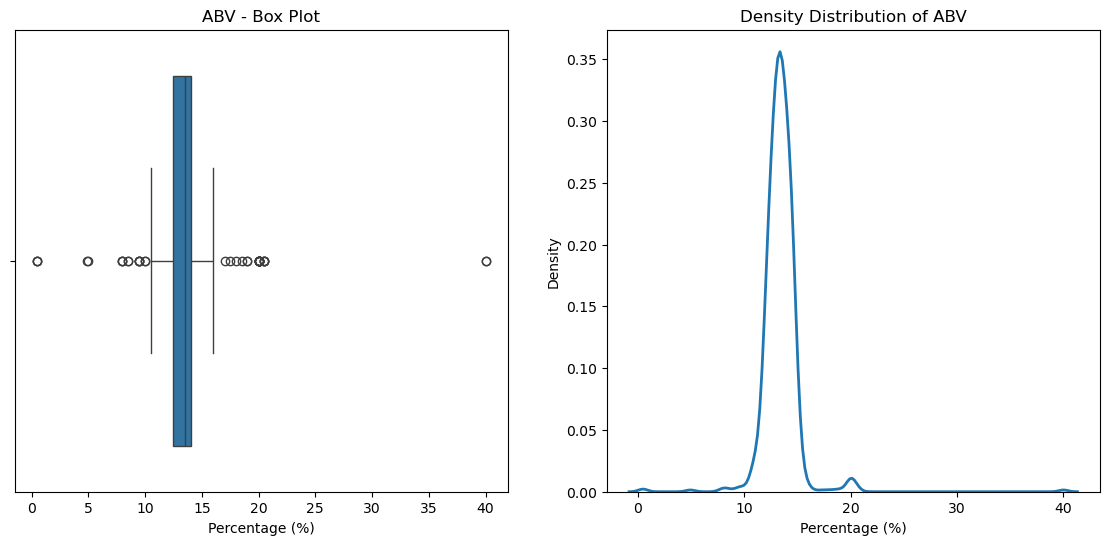

<Figure size 640x480 with 0 Axes>

In [35]:
# Plotting Box Plot and Density Distribution for Price
plt.figure(figsize=(14, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(data=wine_clean, x='ABV')
plt.title('ABV - Box Plot')
plt.xlabel('Percentage (%)')

# Density Distribution Plot
plt.subplot(1, 2, 2)
sns.kdeplot(wine_clean['ABV'], linewidth=2)
plt.title('Density Distribution of ABV')
plt.xlabel('Percentage (%)')
plt.ylabel('Density')
plt.show()

plt.tight_layout()
plt.show()

In [41]:
wine_clean['Grape'].unique()

array(['Tempranillo', 'Chardonnay', 'Sauvignon Blanc', 'Pinot Noir',
       'Glera', 'Unknown', 'Chenin Blanc', 'Castelão ', 'Malagousia',
       'Cinsault', 'Grenache', 'Shiraz', 'Cabernet Sauvignon', 'Bacchus',
       'Viognier', 'Pinot Grigio', 'Garnacha', 'Malbec', 'Cortese',
       'Merlot', 'Melon De Bourgogne', 'Carménère', 'Zinfandel', 'Syrah',
       'Marsanne', 'Gruner Veltliner', 'Corvina', 'Greco', 'Macabeo',
       'Gamay', 'Loureiro', 'Riesling', 'Alvarinho', 'Mourvèdre',
       'Cabernet Franc', 'Vespaiola', 'Picpoul', 'Vermentino',
       'Sangiovese', 'Pinot Meunier', 'Verdejo', 'Primitivo', 'Pinotage',
       'Alicante Bouschet', 'Garganega', 'Godello', 'Carignan',
       'Grenache Blanc', 'Aligoté', 'Siegerrebe', 'Touriga Nacional',
       'Albarino', 'Nerello Mascalese', "Nero D'Avola", 'Turbiana',
       'Pinot Gris', 'Airen', 'Trincadeira', 'Tinta Roriz', 'Xinomavro',
       'Agiorgitiko', 'Pais', 'Gewürztraminer', 'Mencia', 'Verdicchio',
       'Fiano', 'Rondinel

In [42]:
wine_clean['Type'].unique()

array(['Red', 'White', 'Brown', 'Rosé', 'Unknown', 'Mixed', 'Orange',
       'Tawny'], dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4344\3408918353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


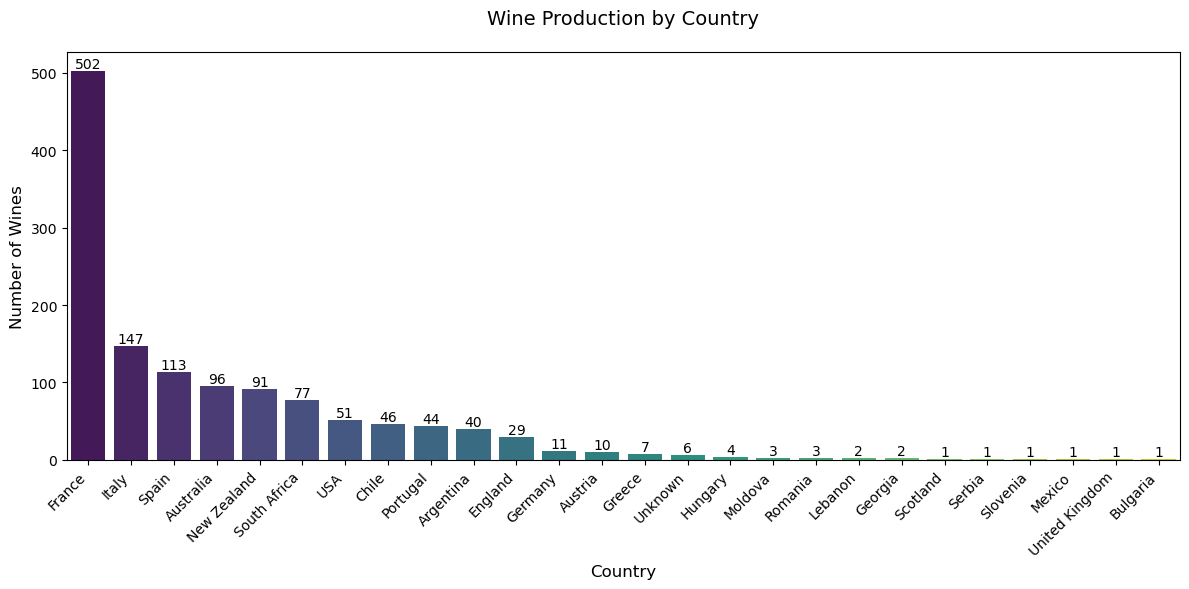

In [43]:
# Count the number of wines per country
country_counts = wine_clean['Country'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Customize the plot
plt.title('Wine Production by Country', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(country_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._